In [13]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

In [14]:
# 生成 2D 分类数据
np.random.seed(42)
num_samples = 50

X1 = np.random.randn(num_samples, 2) + np.array([2, -2])  # 正类 (+1)
X2 = np.random.randn(num_samples, 2) + np.array([-2, 2])  # 负类 (-1)

X = np.vstack((X1, X2))
y = np.hstack((np.ones(num_samples), -np.ones(num_samples)))  # 类别标签：+1 或 -1
print(y.shape)

(100,)


In [15]:
# 添加偏置项 x0 = 1
X = np.hstack((np.ones((X.shape[0], 1)), X))  # 变为 (1, x1, x2)

# 初始化感知机参数 (w0, w1, w2)
w = np.random.randn(3)  # 随机初始化权重

# 记录训练过程中的权重变化
history = [w.copy()]

# 设置学习率
eta = 0.05
epochs = 10  # 训练轮数

# 创建文件夹用于存储帧
frame_folder = "frames"
if not os.path.exists(frame_folder):
    os.makedirs(frame_folder)

In [16]:
# 感知机学习算法
for epoch in range(epochs):
    for i in range(X.shape[0]):
        if np.sign(np.dot(w, X[i])) != y[i]:  # 如果误分类，则更新权重
            w += eta * y[i] * X[i]
            history.append(w.copy())  # 记录权重变化

[array([0.35778736, 0.56078453, 1.08305124]), array([0.40778736, 0.68562023, 0.97613803]), array([0.45778736, 0.77391257, 0.86443118]), array([0.50778736, 0.85074168, 0.74114469]), array([0.55778736, 0.96283979, 0.54548068]), array([0.60778736, 0.9765939 , 0.4173663 ]), array([0.65778736, 1.0026678 , 0.28137409]), array([0.70778736, 0.97168055, 0.22246922]), array([0.65778736, 0.97737125, 0.11374033]), array([ 0.60778736,  1.02023011, -0.02385632]), array([ 0.55778736,  1.02694139, -0.14754797]), array([ 0.50778736,  1.03263209, -0.25627686])]
GIF 动画已保存: perceptron_training.gif


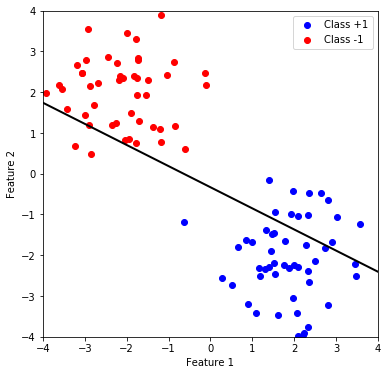

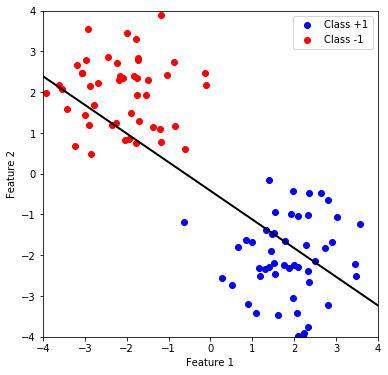

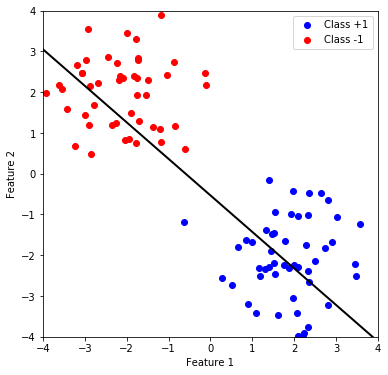

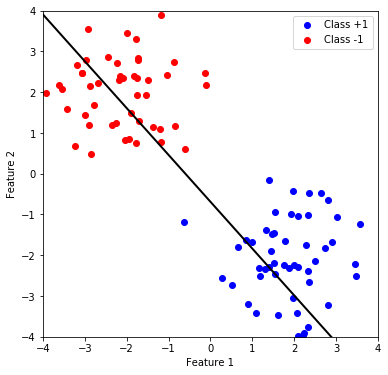

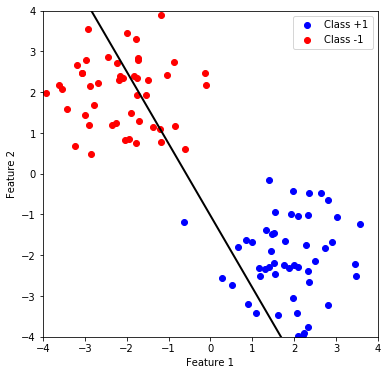

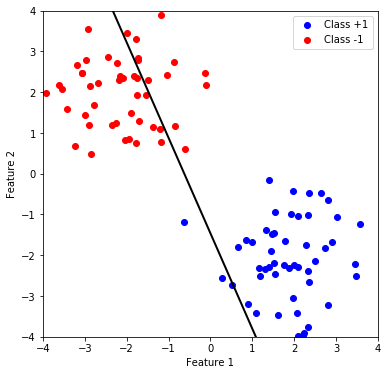

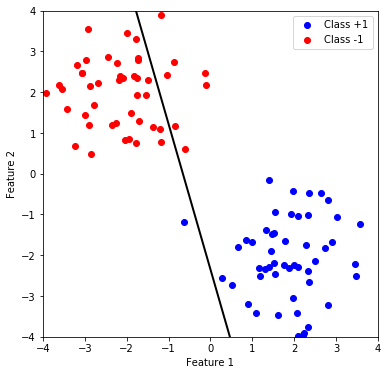

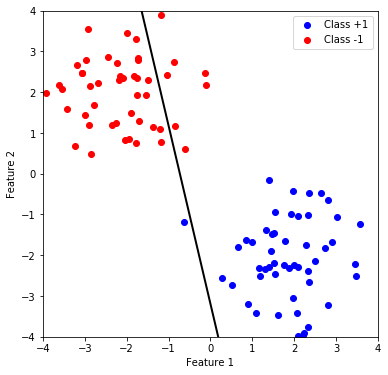

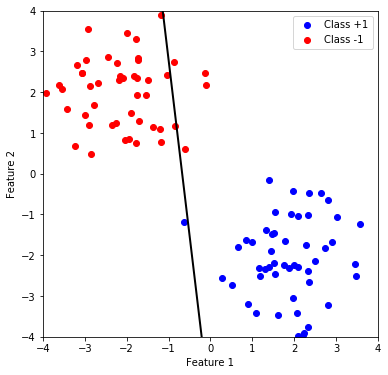

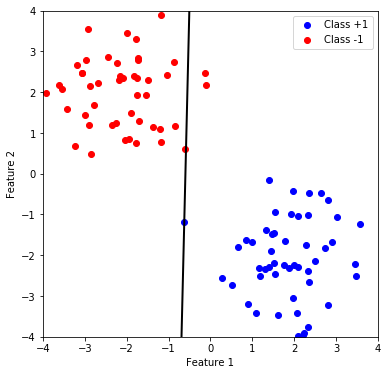

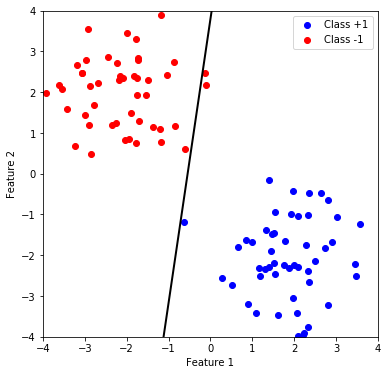

In [17]:
# 绘制并保存帧
frame_paths = []
print(history)
for frame, w in enumerate(history):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # 画出数据点
    ax.scatter(X1[:, 0], X1[:, 1], color='b', label="Class +1")
    ax.scatter(X2[:, 0], X2[:, 1], color='r', label="Class -1")
    
    # 设置坐标轴范围
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.legend()
    
    # 计算决策边界: w0 + w1*x + w2*y = 0  => y = -(w0 + w1*x) / w2
    if w[2] != 0:  # 避免 w2=0 除零错误
        x_vals = np.array([-4, 4])
        y_vals = -(w[0] + w[1] * x_vals) / w[2]
        ax.plot(x_vals, y_vals, 'k-', lw=2)

    # 保存帧
    frame_path = f"{frame_folder}/frame_{frame:03d}.png"
    frame_paths.append(frame_path)
    plt.savefig(frame_path)
plt.close()

# 生成 GIF 动画
gif_path = "perceptron_training.gif"
imageio.mimsave(gif_path, [imageio.imread(frame) for frame in frame_paths], fps=2)

print(f"GIF 动画已保存: {gif_path}")

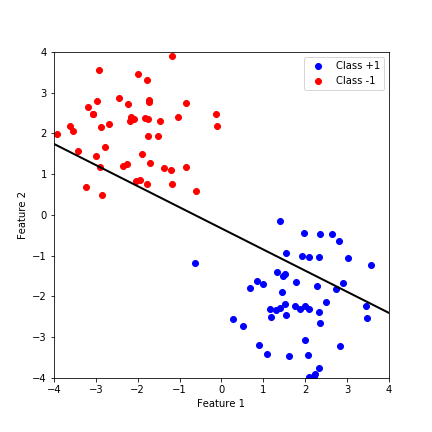

In [18]:
# 显示 GIF
from IPython.display import Image
Image(filename="perceptron_training.gif")